In [0]:
%tensorflow_version 2.x

# CMSC471 Artificial Intelligence

# Assignment-5: Classification and Regression with Neural Networks

Name: Justin Bittinger<br>ID: WH10613


## Overview and Learning Objectives

You have learned the fundamentals of Neural Networks and Deep Learning. You have also learned how to train them based on the techniques discussed in lectures and the contents from Chapter 10 of the textbook (and you'll learn more on training deep neural networks in Chapter 11).

In Part I of this assignment, you are going to build a NN for classification. In Part II, you will build a NN for regression.

Pedagogically, this assignment will help you:
- better understand Neural Networks.

- practice with Tensorflow and Keras API.

- practice the skills you learned in sklearn and combine them with tf/keras to use in your project.

Notice that you should have Tensorflow version 2.0 installed and ready.

Alternatively, you may complete the assignment in [Colab](https://colab.research.google.com) but you need to run the following magic command in Colab to switch to version 2.0:

`%tensorflow_version 2.x`

<b>Important Notice:</b> Some outputs/plots are shared with you in this notebook for your reference. Some outputs are intentionally not shared. Notice that it is the strict course policy NOT to include any (or even parts) of the code solutions and/or answers to the questions in your posts in Piazza. 

In [0]:
# Import necessary Python/tf/keras modules
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [266]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.0.0
Eager Execution mode:  True


## Part I - Classification with NNs

First, [download the data](https://github.com/fereydoonvafaei/UMBC-CMSC-471-Fall-2019/blob/master/Assignment-5/diabetes.csv) `diabetes.csv` The target is to predict the onset of diabetes based on patient's features. You can read more about the data [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [267]:
# Load diabetes data with Pandas, it should be in the same working directory.
df = pd.read_csv("diabetes.csv")

print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## <font color="red"> Required Coding

In [268]:
# Create X, y - Notice that X should contain all the features (columns) except 'Outcome'
# y should include only 'Outcome' because it's the label!
### START CODING HERE ###
X = df.drop(columns = "Outcome")
y = df['Outcome']
### END CODING HERE ###

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [269]:
# Split the data to train and test with test_size=0.33 and random_state=66
### START CODING HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 66)
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(514, 8)
(514,)
(254, 8)
(254,)


> There are different ways to load the data into tf tensors depeneding on your data type (image, text, etc). The following cell is one way of loading pandas dataframes to tensorflow tensors so that you can use tf/keras methods on them.

In [0]:
# Load train and test data to tf
train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_tensor = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

In [271]:
type(train_tensor)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [272]:
for feat, targ in train_tensor.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [  3.   123.   100.    35.   240.    57.3    0.88  22.  ], Target: 0
Features: [  0.    104.     64.     23.    116.     27.8     0.454  23.   ], Target: 0
Features: [10.    75.    82.     0.     0.    33.3    0.263 38.   ], Target: 0
Features: [  4.    183.      0.      0.      0.     28.4     0.212  36.   ], Target: 1
Features: [  2.     98.     60.     17.    120.     34.7     0.198  22.   ], Target: 0


> As discussed in the lectures, data is fed into the network in batches (mini-batches).

In [273]:
# Batch train and test data
train_batch = train_tensor.shuffle(len(X_train)).batch(1)
test_batch = test_tensor.shuffle(len(X_test)).batch(1)

print(type(train_batch))
print(type(test_batch))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


>Now, build the model based on the given architecture specifications.

## <font color="red"> Required Coding

In [0]:
### START CODING HERE ###
# Build a Sequential neural network - a classifier model
nn_clf = tf.keras.Sequential([
    # Create a dense layer with 12 units, input_dim=8, and 'relu' activation function ~ 1 line
    tf.keras.layers.Dense(12, input_dim = 8, activation = 'relu'),
    # Create a dense layer with 8 units, and 'relu' activation function ~ 1 line
    tf.keras.layers.Dense(8, activation = 'relu'),
    # Create a dense layer with ? unit(s), and '?' activation function ~ 1 line
    # YOU should decide on the number of untis and the activation function for this last layer (output layer)
    # Hint: What type of ML task is this problem?
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])  
### END CODING HERE ###

In [0]:
### START CODING HERE ###
# Compile the model by 'adam' optimizer, 'binary_crossentropy' loss and 'accuracy' as metrics ~ 1 line
nn_clf.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
### END CODING HERE ###

In [276]:
### START CODING HERE ###
# Fit nn_clf model on train_batch with 150 epochs
nn_clf_history = nn_clf.fit(X, y, epochs = 150)
### END CODING HERE ###

Train on 768 samples
Epoch 1/150
768/768 [==============================] - 0s 196us/sample - loss: 3.5274 - accuracy: 0.6003
Epoch 2/150
768/768 [==============================] - 0s 54us/sample - loss: 2.5490 - accuracy: 0.6198
Epoch 3/150
768/768 [==============================] - 0s 64us/sample - loss: 2.0719 - accuracy: 0.6146
Epoch 4/150
768/768 [==============================] - 0s 52us/sample - loss: 1.8093 - accuracy: 0.6029
Epoch 5/150
768/768 [==============================] - 0s 63us/sample - loss: 1.6390 - accuracy: 0.6016
Epoch 6/150
768/768 [==============================] - 0s 66us/sample - loss: 1.5165 - accuracy: 0.6029
Epoch 7/150
768/768 [==============================] - 0s 59us/sample - loss: 1.3848 - accuracy: 0.6107
Epoch 8/150
768/768 [==============================] - 0s 50us/sample - loss: 1.2879 - accuracy: 0.6107
Epoch 9/150
768/768 [==============================] - 0s 65us/sample - loss: 1.2042 - accuracy: 0.6276
Epoch 10/150
768/768 [====================

> `history` now contains values for `loss` and `accuracy` during training, let's plot them.

(0, 1)

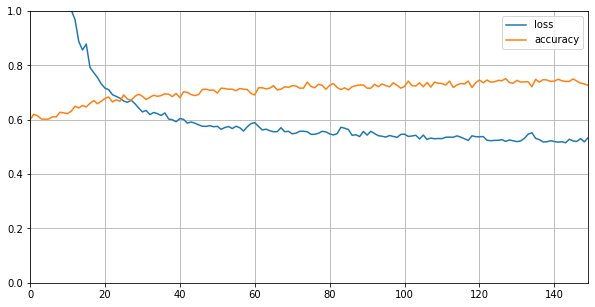

In [277]:
pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

## <font color="red"> Required Coding

In [278]:
### START CODING HERE ###
# evaluate nn_clf model on test_batch using .evaluate method
_, accuracy = nn_clf.evaluate(X, y)
print('Accuracy is: %.6f' % (accuracy * 100))
### END CODING HERE ###

768/768 [==============================] - 0s 52us/sample - loss: 0.5108 - accuracy: 0.7396
Accuracy is: 73.958331


In [279]:
nn_clf.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_64 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


> Now, let's plot ROC curve for this neural network model. Recall from Assignment-4 that you need to get class probabilities, fpr and tpr. To get class probabilities, keras has `predict()` method. Notice that it's applied on `X_test` not `test_batch`. Alternatively, you can use `predict_proba()` method, similar to sklearn, which would generate identical results.

In [280]:
# Get class probabilities for nn - ignore the warning
nn_preds = nn_clf.predict(X_test).ravel()

In [281]:
# See class probabilities predicted by nn classifier
nn_preds[:5]

array([0.12393677, 0.17900467, 0.18561217, 0.23749372, 0.02067345],
      dtype=float32)

## <font color="red"> Required Coding

Text(0, 0.5, 'True Positive Rate')

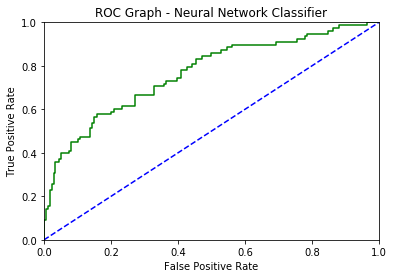

In [282]:
### START CODING HERE ### 
# Plot ROC curve for nn_clf - Write as many lines of code as needed
# Hint: check back your Assignment-4 code, you need to calculate tpr, fpr, thresholds
# Plot should have all the elements that Assignment-4 ROC curves had, title, xlabel and ylabel, xlim & ylim
# Plot should also have AUC_NN (roc_auc) shown on lower right

#nn_preds already declared earlier, no need for it here
nn_fpr, nn_tpr, nn_threshold = metrics.roc_curve(y_test, nn_preds)
nn_roc_auc = metrics.auc(nn_fpr, nn_tpr)

# Graph components to follow
plt.title('ROC Graph - Neural Network Classifier')
plt.plot(nn_fpr, nn_tpr, 'g', label='AUC_NN - %.2f' % nn_roc_auc)

# Plot the points, limits (both x & y's = 1), and the labels for x & y
plt.plot([0,1],[0,1],'b--')   # sets the graph view
plt.xlim([0,1])  # x ranges from 0->1
plt.ylim([0,1])  # y ranges from 0->1
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### END CODING HERE ###

## Part I - Questions

<b>ANSWER THE FOLLOWING QUESTIONS HERE:</b><br>

Q1 - If this problem was a multi-class classification, what activation function would you use for the output layer neurons? How many neurons would be required for the output layer for multi-class? What other hyperparameters of nn can you change in different tasks? Name at least 3 other hyperparameters. GIVE COMPLETE ANSWER!
<br>`Answer: You would need to use the softmax activation function and would need 3 neurons for the outer layer. The other hyperparameters you can change, in different tasks, are 1) learning rate, which can change how the accuracy is represented, 2) the number of neurons in hidden layers, which adds depth, and 3) batch size, which can affect the AUC.`


Q2 - Change the batch number from 1 to 10. Would it improve or hurt the results? Make an argument with reasoning on your observation (you may consult with page 326 of the textbook).
<br>`Answer: Changing the batch size from 1 to 10 improves the results. While the loss vs accuracy graph isn't as smooth, meaning it is more jagged, the overall accuracy seems to improve and the AUC also greatly improves compared to before. I believe this occurs because only having 1 batch to work with is very limiting. While having too many batches can be overbearing and take up more time and space, having a larger number than 1 is a good idea. 10 batches gives the machine a chance to look at this 10 times and then gather the results. Please note that I tested this multiple times with both train and test at 10 batches, since that is what the instructions said to do. Doing this appeared to generate better results, even if minor, overall.`

## Part II - Regression with NNs

In this part, you will create a neural network to do a regression task.

[Download the data from here](https://github.com/fereydoonvafaei/UMBC-CMSC-471-Fall-2019/blob/master/Assignment-5/auto.csv). This is cars dataset. You can read more about the data [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg). The goal is predicting MPG based on other features.

In [283]:
auto_data = pd.read_csv('auto.csv')
print(auto_data.shape)
auto_data.head()

(398, 8)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [284]:
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

## <font color="red"> Required Coding

In [285]:
### START CODING HERE ### 
# Drop all na's using dataframe .dropna(inplace=True) method ~ 1 line
auto_data.dropna(inplace = True)
### END CODING HERE ###
auto_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

>For some datasets like this, a technique in data preprocessing is used to encode categorical features to dummy variables. Here, we convert <b>Origin</b> (which looks numeric but is actually categorical) using pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) method. This technique is one example of One Hot Encoding of categorical features.

In [286]:
auto_data['Origin'] = auto_data['Origin'].map(lambda x: {1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))
auto_data = pd.get_dummies(auto_data, prefix='', prefix_sep='')
print(auto_data.shape)
auto_data.head()

(392, 10)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


## <font color="red"> Required Coding

In [287]:
### START CODING HERE ### 
# Create X and y, X should contain all features except MPG column and y should only contain MPG column
# Hint: You can use dataframe .pop() method, but you may need to create a deep copy of the dataframe first
# There are usually multiple ways of doing these operations in pnadas dataframes
X = auto_data.drop(columns = "MPG")
y = auto_data['MPG']
### END CODING HERE ###
print(X.shape)
print(y.shape)
X.head()

(392, 9)
(392,)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,0,1


> <b>Note:</b> The original auto_data dataframe should remain the same and should still include MPG.

In [288]:
auto_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


>Normalization is a good pratice when you work with values with different ranges.

In [289]:
# Normalize X 
X = (X - X.mean())/X.std()
print(X.shape)
X.head()

(392, 9)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,-0.457538,-0.501749,0.773608
1,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,-0.457538,-0.501749,0.773608
2,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,-0.457538,-0.501749,0.773608
3,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,-0.457538,-0.501749,0.773608
4,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,-0.457538,-0.501749,0.773608


## <font color="red"> Required Coding

In [290]:
### START CODING HERE ###
# Split the data to train and test using train_test_split method with test_size=0.2 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)
### END CODING HERE ###

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(313, 9)
(313,)
(79, 9)
(79,)


In [0]:
### START CODING HERE ### 
# Build a neural network for regression
nn_reg1 = tf.keras.Sequential([
    # Create a dense layer with 64 neurons, 'relu' activation function and input_shape=[len(X_train.keys())]
    tf.keras.layers.Dense(64, activation = 'relu', input_shape = [len(X_train.keys())]),
    # Create a dense layer with 64 neurons and 'relu' activation function
    tf.keras.layers.Dense(64, activation = 'relu'),
    # Create a dense layer with ? neuron(s) and ? activation
    # YOU should decide how many neuron(s) is/are needed and what activation function (if any) to use for output
    # Hint: What type of ML task is this problem?
    tf.keras.layers.Dense(1)
    ])
### END CODING HERE ###

In [0]:
# This is another way of defining the optimizer, you can pass learning_rate and other parameters to it.
optimizer = tf.keras.optimizers.RMSprop(0.001)

### START CODING HERE ### 
# Compile nn_reg1 with 'mse' loss, optimizer=optimizer, metrics=['mae', 'mse']
nn_reg1.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae','mse'])
### END CODING HERE ###

In [293]:
nn_reg1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 64)                640       
_________________________________________________________________
dense_67 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_68 (Dense)             (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


## <font color="red"> Required Coding

In [294]:
EPOCHS = 1000

### START CODING HERE ### 
# fit nn_reg1 on X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1
nn_reg1_history = nn_reg1.fit(X_train, y_train, epochs = EPOCHS, validation_split = .2, verbose = 1)
### END CODING HERE ###

Train on 250 samples, validate on 63 samples
Epoch 1/1000
250/250 [==============================] - 0s 598us/sample - loss: 569.7200 - mae: 22.5362 - mse: 569.7200 - val_loss: 621.0953 - val_mae: 23.6862 - val_mse: 621.0952
Epoch 2/1000
250/250 [==============================] - 0s 75us/sample - loss: 523.8890 - mae: 21.4707 - mse: 523.8889 - val_loss: 574.2553 - val_mae: 22.6582 - val_mse: 574.2552
Epoch 3/1000
250/250 [==============================] - 0s 72us/sample - loss: 478.8602 - mae: 20.3627 - mse: 478.8602 - val_loss: 522.8912 - val_mae: 21.4745 - val_mse: 522.8912
Epoch 4/1000
250/250 [==============================] - 0s 80us/sample - loss: 429.3261 - mae: 19.0689 - mse: 429.3260 - val_loss: 464.7005 - val_mae: 20.0582 - val_mse: 464.7005
Epoch 5/1000
250/250 [==============================] - 0s 75us/sample - loss: 373.6935 - mae: 17.5543 - mse: 373.6935 - val_loss: 400.7120 - val_mae: 18.4084 - val_mse: 400.7120
Epoch 6/1000
250/250 [==============================] - 0s 

In [295]:
### START CODING HERE ### 
# Evaluate nn_reg1 using .evaluate() method on X_test, y_test and verbose=2
loss1, mae1, mse1 = nn_reg1.evaluate(X_test, y_test, verbose = 2)
### END CODING HERE ###

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae1))

79/79 - 0s - loss: 6.2805 - mae: 1.8779 - mse: 6.2805
Testing set Mean Abs Error:  1.88 MPG


In [296]:
# Your numbers might be a little different due to the randomness!
hist1 = pd.DataFrame(nn_reg1_history.history)
hist1['epoch'] = nn_reg1_history.epoch
hist1.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.601517,1.014175,2.601516,6.330175,1.874348,6.330175,995
996,2.471494,0.957227,2.471494,6.576865,1.861933,6.576865,996
997,2.657730,1.023978,2.657730,7.602674,2.008889,7.602674,997
998,2.965806,1.036911,2.965806,6.696673,1.928331,6.696673,998
999,2.616071,1.000939,2.616071,7.648971,2.040980,7.648971,999


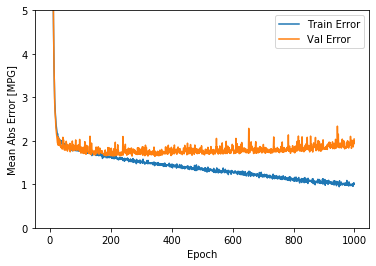

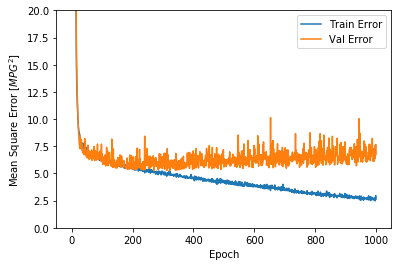

In [297]:
# Your plots might be slightly different, i.e. they should look very similar to the plots below!
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(nn_reg1_history)

> Based on the above plots, it looks like that there is not too much improvement after around 100 epochs. Later when we study Chapter 11, you will learn that there is a technique called `EarlyStopping` that can be used here which stops training if there is not much improvement after a fixed number of epochs. Moreover for now, you should fine-tune the hyperparameters of the network to see if you can see any improvements. Report the results of your hyperparameter tuning in the following cell. This is what's called <b>Grid Search</b> in hyperparameter tuning.

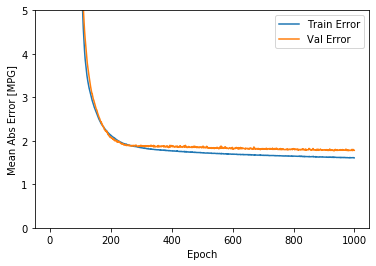

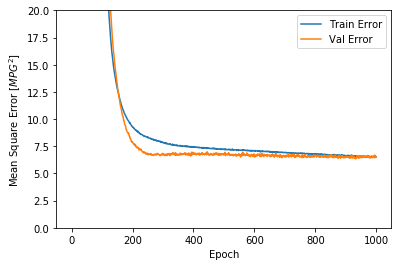

In [298]:
### START CODING HERE ### 
# Build another regression neural network with the same architecture,
# but you later compile it with different hyperparameters
nn_reg2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu', input_shape = [len(X_train.keys())]),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1)
    ])

# Fine-tune the optimizer as follows:
# First, try a different optimizer - SGD with the learning_rate = 0.001
# Then, switch optimizer to Adam,
# and use three different values of learning_rate in the order of 10 or 10^(-1) like 0.01, 0.1 and 1.
# You may try other values for learning_rate.
# Report the results of your hyperparameter tuning in the following cell.
optimizer = tf.keras.optimizers.SGD(learning_rate = .001)

# Compile nn_reg2 with loss='mae', optimizer=optimizer and metrics=['mae', 'mse']
nn_reg2.compile(loss = 'mae', optimizer = optimizer, metrics = ['mae','mse'])

# Fit nn_reg2 on X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=0
nn_reg2_history = nn_reg2.fit(X_train, y_train, epochs = EPOCHS, validation_split = .2, verbose = 0)
### END CODING HERE ###

plot_history(nn_reg2_history)

In [299]:
### START CODING HERE ### 
# Evaluate nn_reg2 using .evaluate() method on X_test, y_test and verbose=2
loss2, mae2, mse2 = nn_reg2.evaluate(X_test, y_test, verbose = 2)
### END CODING HERE ###

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae2))

79/79 - 0s - loss: 1.6647 - mae: 1.6647 - mse: 5.9435
Testing set Mean Abs Error:  1.66 MPG


Report the results of your hyperparameter tuning HERE:

SGD - Testing Set mae: `1.66` MPG
<br>
Adam learning_rate1 - Testing Set mae: `2.15` MPG    //using .01
<br>
Adam learning_rate2 - Testing Set mae: `2.23` MPG     //using .10
<br>
Adam learning_rate3 - Testing Set mae: `5.90` MPG    //using 1

> You can check the quality of the model predictions by the following plot. Use this plot to answer Part II Q1.

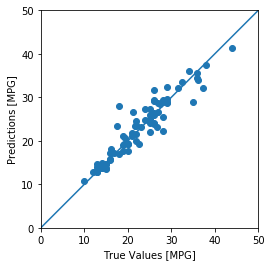

In [300]:
# Use the best hyperparameters you found for compiling nn_reg2, then run this cell
nn_reg2_preds = nn_reg2.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, nn_reg2_preds)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

## Part II - Questions

<b>ANSWER THE FOLLOWING QUESTIONS HERE:</b>

Q1- How do you interprete the plot above in terms of the model performance (Predictions vs True Values)? GIVE COMPLETE ANSWER!
<br>`Answer: I interpret the above graph as the following: as the MPG for the predictions increase, so do the true values for MPG. Look at the bottom left dot. It's approximately 10 for both predictions and true values. The same, or similar, could be said for those values at 20, 30, and even 40. Of course, with all line graphs/scatter plots, there are outliers. But for the most part the two numbers are generally the same.`

Q2 - How do you interprete the first regression model's plots of mse and mae, i.e. `plot_history(nn_reg1_history)`? What is the impact of choosing `mse` vs `mae`? Why the axis scales are different for `mse` and `mae`? GIVE COMPLETE ANSWER!
<br>`Answer: I interpret the first model's plots as MSE being less strict than MAE in terms of Val Error vs Train Error ratio. The impact of choosing MSE over MAE is that MAE appears to overfit the data, which is not what we want. MSE seemingly does a good enough job keeping close to the data, but enough to not be classified as underfitting. The y-axis scales are different because of the calculations. MAE involves absolute values, while MSE involves the use of squaring and roots. This can cause the numbers to see floating point decimals or be much larger than the values plotted against in the MAE graph.`

Q3 - What is the role of `validation_split` hyperparameter in `fit` method? What does it change exactly and why is it used? GIVE COMPLETE ANSWER!
<br>`Answer: The role is to find a floating point number between 0 and 1. It changes the amount of training data that is used. For example, if a float of .145 is selected, then 14.5% of the training data will be set apart. It is used because it will evaluate the loss and model metrics against this data at the end of each epoch.`

## Optional Part III - <font color=green>Extra Credit</font>

<b>Notice:</b> This part is totally optional and for earning <b><font color=green>extra credit</font></b> in the "Assignment" section of your final grade. Attempt this part only if you have enough time and you're inclined to challenge yourself a bit!<br>

[Download the video games dataset](https://raw.githubusercontent.com/fereydoonvafaei/UMBC-CMSC-478-Fall-2019/master/Assignment-4/video.csv)<br> 

You can read about the data [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). <br>

Build a neural network that can predict the "<b>Rating</b>" of each game based on other features. Alternatively, you may predict either the global sales or regional sales (in North America, Europe, etc) for each row/video game. Perform any necessary preprocessing steps needed on the dataset. <br>

You should create a separate notebook for Extra Credit attempt and submit it via a separate link in Blackboard. If you can get good results based on the instructor's judgement of your work, you may earn up to 50 points of extra credit for A5 that can be used for the missing points of "Assignment" section of your final grade.<br>

<b>Note:</b> Extra credits for A5 can only be used to compensate for "Assignment" section NOT for any other sections of the final grade such as quizzes or exams.

In [0]:
video_data = pd.read_csv('video.csv')
print(video_data.shape)
video_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
video_data.dropna(inplace=True)
print(video_data.shape)
video_data.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


## Grading

For Assignment 5, your notebook will be run and graded with a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and answer ALL questions COMPLETELY. Also, your notebook should be written with no grammatical and spelling errors and should be nicely-formatted and easy-to-read.

The breakdown of the 100 points is as follows:

Part I implementaion has 40 points:
- 10 points: preprocessing steps.
- 15 points: nn_clf implementation, and compile.
- 15 points: correct ROC curve for nn_clf.

Part I questions have 10 points (5 points each).

Part II implementaion has 35 points:
- 10 points: preprocessing steps.
- 10 points: nn_reg1 implementation, and compile.
- 15 points: nn_reg2 implementation, and compile including hyperparameter tuning.

Part II questions have 15 points (5 points each).

Part III is optional and for Extra Credit only - up to 50 extra points based on the quality of your work.

Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical and spelling errors.

## How to Submit and Due Date

Name your notebook ```Lastname-A5.ipynb```. Submit the file using the ```Assignment-5``` link on Blackboard.

If you attempt the Extra Credit in Part III, create a separate notebook including all the necessary code, name it `Lastname-A5-EC.ipynb` and submit it using the ```A5-Extra-Credit``` link on Blackboard.

Grading will be based on 

  * correct implementation, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Monday December 2nd 11:59PM.</b></font>